In [1]:
path = '../data/'

In [79]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
os.listdir(path)

['test_data.csv',
 'train_data.csv',
 'sample_submission.csv',
 '.ipynb_checkpoints']

In [3]:
train = pd.read_csv(path + 'train_data.csv')
test = pd.read_csv(path + 'test_data.csv')
submission = pd.read_csv(path + 'sample_submission.csv')

In [4]:
print(train.shape)
print(test.shape)
print(submission.shape)

(2266586, 6)
(260114, 6)
(744, 2)


## Train, Test 기본 정보 확인
- train 과 test 데이터에는 겹치는 userID 가 없다.
- train 과 test 데이터는 동일한 KnowledgeTag 를 사용하며, 912 개 있다.
- null data 가 없다.

In [41]:
train.head(2)

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225


In [42]:
test.head(2)

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,3,A050023001,A050000023,1,2020-01-09 10:56:31,2626
1,3,A050023002,A050000023,1,2020-01-09 10:56:57,2626


In [43]:
submission.head(2)

,id,prediction
0,0,0.5
1,1,0.5


In [50]:
# test data 의 마지막 문제를 예측하는 문제
test.userID.nunique()

744

In [44]:
# train 과 test 에는 겹치는 userID 가 없다.
len(set(train.userID) & set(test.userID))

0

In [45]:
# train 과 test 에서 사용된 knowledgeTage 는 동일하다. 
len(set(train.KnowledgeTag) - set(test.KnowledgeTag))

0

In [46]:
for col in train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(msg)

column:     userID	 Percent of NaN value: 0.00%
column: assessmentItemID	 Percent of NaN value: 0.00%
column:     testId	 Percent of NaN value: 0.00%
column: answerCode	 Percent of NaN value: 0.00%
column:  Timestamp	 Percent of NaN value: 0.00%
column: KnowledgeTag	 Percent of NaN value: 0.00%


In [47]:
for col in test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (test[col].isnull().sum() / test[col].shape[0]))
    print(msg)

column:     userID	 Percent of NaN value: 0.00%
column: assessmentItemID	 Percent of NaN value: 0.00%
column:     testId	 Percent of NaN value: 0.00%
column: answerCode	 Percent of NaN value: 0.00%
column:  Timestamp	 Percent of NaN value: 0.00%
column: KnowledgeTag	 Percent of NaN value: 0.00%


In [65]:
total_df = pd.concat( [train,test[test['answerCode'] != -1] ])

In [67]:
print(f"""--- BASIC INFORMATIONS ---
userID           : {total_df.userID.nunique()}
assessmentItemID : {total_df.assessmentItemID.nunique()}
testID           : {total_df.testId.nunique()}
mean answer rate : {total_df.answerCode.sum() / total_df.shape[0] * 100:.2f}%
KnowledgeTag     : {total_df.KnowledgeTag.nunique()}
{'-'*26}""")

--- BASIC INFORMATIONS ---
userID           : 7442
assessmentItemID : 9454
testID           : 1537
mean answer rate : 65.46%
KnowledgeTag     : 912
--------------------------


In [69]:
print(f"""--- BASIC INFORMATIONS ---
userID           : {train.userID.nunique()}
assessmentItemID : {train.assessmentItemID.nunique()}
testID           : {train.testId.nunique()}
mean answer rate : {train.answerCode.sum() / train.shape[0] * 100:.2f}%
KnowledgeTag     : {train.KnowledgeTag.nunique()}
{'-'*26}""")

--- BASIC INFORMATIONS ---
userID           : 6698
assessmentItemID : 9454
testID           : 1537
mean answer rate : 65.44%
KnowledgeTag     : 912
--------------------------


## 1. UserID 
- [x] 문제 풀이 갯수
- [x] 정답 확률
- [x] 맞춘 갯수
    - 정답 확률로 계산하는 것이 적절해보인다. 
- [x] 각 유저별 과거 정답률: 과거에 맞춘 문제 수 / 과거에 푼 문제 수


In [88]:
def percentile(s):
    return np.sum(s) / len(s)

In [ ]:
# userID 별 푼 문항 수와 정답률 
stu_groupby = train.groupby('userID').agg({
    'assessmentItemID': 'count',
    'answerCode': percentile
})
stu_groupby.describe().T

### a ) user 별 문제 풀이 갯수

/tmp/ipykernel_28232/417151868.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True)


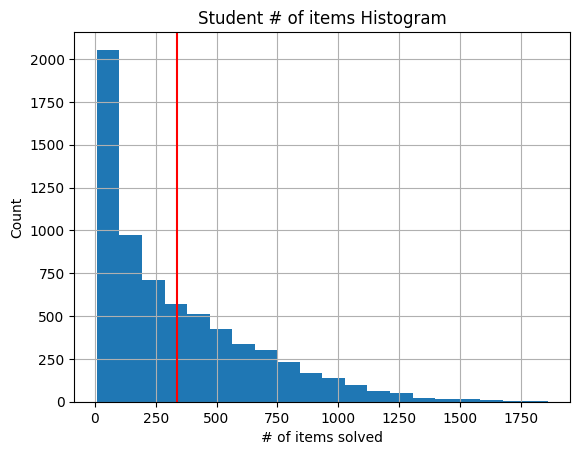

In [85]:
fig, ax = plt.subplots()

stu_groupby['assessmentItemID'].hist(bins=20, ax=ax)

ax.set_title('Student # of items Histogram')
ax.set_xlabel('# of items solved')
ax.set_ylabel('Count')
ax.axvline(stu_groupby['assessmentItemID'].mean(), color='red')
ax.grid(b=True)

### b ) 정답률 비율

/tmp/ipykernel_28232/1795024208.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True)


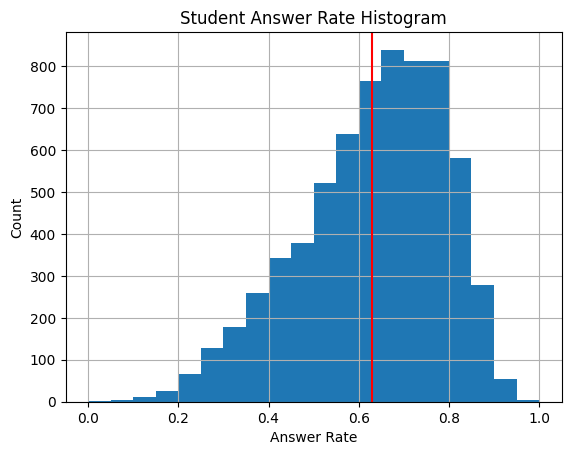

In [86]:
fig, ax = plt.subplots()

stu_groupby['answerCode'].hist(bins=20)

ax.set_title('Student Answer Rate Histogram')
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Count')
ax.axvline(stu_groupby['answerCode'].mean(), color='red')
ax.grid(b=True)

### c ) 정답 문항 갯수

In [92]:
# userID 별 푼 문항 수와 정답 문항 갯수 
train.groupby('userID').agg({
    'assessmentItemID': 'count',
    'answerCode': 'sum'
}).describe().T

,count,mean,std,min,25%,50%,75%,max
assessmentItemID,6698.0,338.397432,321.331429,9.0,78.0,231.5,513.0,1860.0
answerCode,6698.0,221.439982,228.725932,0.0,46.0,140.0,327.0,1552.0


### d ) 각 유저별 과거 정답률: 과거에 맞춘 문제 수 / 과거에 푼 문제 수

In [129]:
stu_correct_df = train.copy()

# 과거에 푼 문제 수 
stu_correct_df['past_count'] = stu_correct_df.groupby('userID').cumcount()

# 과거에 맞춘 문제 수 
stu_correct_df['shift'] = stu_correct_df.groupby('userID')['answerCode'].shift().fillna(0)
stu_correct_df['past_correct'] = stu_correct_df.groupby('userID')['shift'].cumsum()

# 과거 평균 정답률
stu_correct_df['average_correct'] = (stu_correct_df['past_correct'] / stu_correct_df['past_count']).fillna(0)

stu_correct_df[['userID','answerCode', 'average_correct']]

,userID,answerCode,average_correct
0,0,1,0.000000
1,0,1,1.000000
2,0,1,1.000000
3,0,1,1.000000
4,0,1,1.000000
...,...,...,...
2266581,7441,0,0.250000
2266582,7441,1,0.200000
2266583,7441,1,0.333333
2266584,7441,1,0.428571


### e ) 풀이 시간이 짧은 경우와 정답 확률
🐬 시험지 난이도를 상/중/하 로 구분 ? ${\rightarrow}$ 상/중/하에 대한 주관이 들어간다 .

In [103]:
stu_guess = train.groupby(['userID','Timestamp']).filter(lambda x: len(x) > 1)

In [429]:
stu_guess

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
122,0,A080016007,A080000016,1,2020-05-07 00:52:47,4672
123,0,A080016008,A080000016,0,2020-05-07 00:52:47,4672
145,0,A080020007,A080000020,0,2020-05-14 01:35:29,4673
146,0,A080020006,A080000020,0,2020-05-14 01:35:29,4673
262,0,A080039003,A080000039,0,2020-06-11 02:02:22,4688
...,...,...,...,...,...,...
2264692,7320,A080106008,A080000106,0,2020-11-06 06:47:34,1182
2265774,7387,A070081005,A070000081,0,2020-04-21 03:12:08,9186
2265775,7387,A070081006,A070000081,0,2020-04-21 03:12:08,9186
2266223,7419,A030126003,A030000126,0,2020-10-15 13:29:56,574


In [104]:
stu_guess_groupby = stu_guess.groupby('userID').agg({
    'assessmentItemID': 'count',
    'answerCode': percentile
})
stu_guess_groupby.describe().T

,count,mean,std,min,25%,50%,75%,max
assessmentItemID,1949.0,7.523858,9.639608,2.0,2.0,4.0,8.000,147.0
answerCode,1949.0,0.416832,0.335994,0.0,0.0,0.5,0.625,1.0


#### e - 1 ) 학생들이 많이 찍은 시험 ${\rightarrow}$ 어려운 시험 

In [121]:
stu_guess_groupby_testId = stu_guess.groupby('testId').agg({ 'userID' : 'count' , 'answerCode' : percentile}).reset_index()


In [128]:
stu_guess_groupby_testId.sort_values(by='userID')

,testId,userID,answerCode
412,A070000087,48,0.520833
429,A070000104,49,0.693878
619,A080000130,49,0.428571
626,A080000137,50,0.480000
671,A090000045,50,0.520000
...,...,...,...
538,A080000049,78,0.166667
498,A080000009,82,0.414634
517,A080000028,85,0.317647
624,A080000135,92,0.445652


#### e - 2 ) 풀이 횟수 별 평균 정답률 

- userID 별 한 번 푼 문제인데 timestamp 가 겹치는 경우 

In [155]:
stu_assessmentID_group = train.groupby(['userID','assessmentItemID']).filter(lambda x: len(x) == 1)

In [156]:
stu_assessmentID_guess_group = stu_assessmentID_group.groupby(['userID','Timestamp']).filter(lambda x: len(x) > 1)

In [157]:
stu_assessmentID_guess_group

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
122,0,A080016007,A080000016,1,2020-05-07 00:52:47,4672
123,0,A080016008,A080000016,0,2020-05-07 00:52:47,4672
145,0,A080020007,A080000020,0,2020-05-14 01:35:29,4673
146,0,A080020006,A080000020,0,2020-05-14 01:35:29,4673
262,0,A080039003,A080000039,0,2020-06-11 02:02:22,4688
...,...,...,...,...,...,...
2264692,7320,A080106008,A080000106,0,2020-11-06 06:47:34,1182
2265774,7387,A070081005,A070000081,0,2020-04-21 03:12:08,9186
2265775,7387,A070081006,A070000081,0,2020-04-21 03:12:08,9186
2266223,7419,A030126003,A030000126,0,2020-10-15 13:29:56,574


In [158]:
stu_assessmentID_guess_groupby = stu_assessmentID_guess_group.groupby('userID').agg({
    'assessmentItemID': 'count',
    'answerCode': percentile
})
stu_assessmentID_guess_groupby.describe().T

,count,mean,std,min,25%,50%,75%,max
assessmentItemID,1922.0,7.314256,9.301089,2.0,2.0,4.0,8.000000,147.0
answerCode,1922.0,0.417277,0.338276,0.0,0.0,0.5,0.642857,1.0


- 해당 문제에서 timestamp 가 겹친 사람이 몇 명인지, 정답률 평균은 얼마인지 확인

In [160]:
stu_assessmentID_guess_groupby_testId = stu_assessmentID_guess_group.groupby('testId').agg({ 'userID' : 'count' , 'answerCode' : percentile}).reset_index()


In [161]:
# sample data check : testId = A010000006
stu_assessmentID_guess_group[stu_assessmentID_guess_group['testId'] == 'A010000006']

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
551734,779,A010006001,A010000006,1,2020-06-17 13:44:11,5846
551735,779,A010006002,A010000006,1,2020-06-17 13:44:11,6308


In [162]:
stu_assessmentID_guess_groupby_testId.sort_values(by='userID')

,testId,userID,answerCode
153,A040000069,1,0.000000
209,A050000070,1,1.000000
230,A050000138,1,1.000000
81,A030000011,1,1.000000
90,A030000059,1,1.000000
...,...,...,...
607,A080000136,77,0.454545
499,A080000028,82,0.329268
480,A080000009,82,0.414634
606,A080000135,90,0.444444


In [163]:
stu_assessmentID_guess_groupby_testId.sort_values('userID')

,testId,userID,answerCode
153,A040000069,1,0.000000
209,A050000070,1,1.000000
230,A050000138,1,1.000000
81,A030000011,1,1.000000
90,A030000059,1,1.000000
...,...,...,...
607,A080000136,77,0.454545
499,A080000028,82,0.329268
480,A080000009,82,0.414634
606,A080000135,90,0.444444


## 2. assessmentItemID 별 맞춘 갯수, 정답률 평균
- [ ] 문항 별 정답률 분석 
- [ ] 문항 별 정답률 분석 


## 3. 시험지별 정답률 
🍀 유의미한 차이를 보이므로 assessmentItemID 를 카테고리, 번호, 문항 번호로 나누어 사용 

- assessmentItemID : A060001001
- testID : A060000001

- assessmentItemID : A080082006
- testID : A080000082
    - category 8, 82번째 시험지, 6번 문항 

**따라서**
- 시험지 카테고리는 최대 두 자리 수 
- 시험지 번호는 최대 네 자리 수 
- 문항 번호는 최대 세 자리 수


In [372]:
ana_assessmentItemID = train.copy()

In [373]:
train['testId'].apply(lambda x: x[2]).unique()

array(['6', '8', '2', '4', '9', '3', '5', '1', '7'], dtype=object)

In [374]:
ana_assessmentItemID["test_category"] = ana_assessmentItemID['testId'].apply(lambda x: x[2])

In [430]:
ana_assessmentItemID['assessmentItemID'].apply(lambda x: x[4:7]).unique()

array(['001', '003', '005', '007', '002', '009', '016', '004', '006',
       '018', '020', '008', '010', '022', '012', '014', '024', '031',
       '033', '035', '037', '039', '041', '043', '036', '052', '054',
       '038', '056', '058', '060', '040', '062', '042', '070', '072',
       '074', '044', '076', '078', '046', '048', '085', '087', '089',
       '091', '093', '094', '095', '096', '097', '080', '099', '082',
       '101', '084', '103', '086', '105', '088', '107', '090', '092',
       '098', '172', '121', '100', '123', '125', '102', '174', '181',
       '127', '129', '182', '131', '183', '119', '115', '192', '108',
       '112', '114', '118', '120', '128', '013', '015', '017', '019',
       '021', '049', '051', '063', '065', '073', '075', '081', '083',
       '011', '023', '025', '026', '034', '027', '028', '029', '030',
       '032', '050', '047', '155', '156', '068', '157', '158', '064',
       '066', '160', '059', '161', '162', '163', '164', '165', '104',
       '184', '106',

In [375]:
ana_assessmentItemID["test_seq_id"] = ana_assessmentItemID['assessmentItemID'].apply(lambda x: x[4:7])

In [376]:
train['assessmentItemID'].apply(lambda x: x[7:10]).unique()

array(['001', '002', '003', '004', '005', '007', '006', '008', '009',
       '010', '011', '012', '013'], dtype=object)

In [377]:
ana_assessmentItemID["num_in_test"] = ana_assessmentItemID['assessmentItemID'].apply(lambda x: x[7:10])

### 3 - 1 . 시험지 카테고리 별 tag 의 차이가 있을까 ? 
${\rightarrow}$ knowledgeTag 는 대개 한 개의 test_category 에 속한다. `예외` : KnowledgeTag 7863, test_category 7, 8

In [378]:
ana_assessmentItemID.groupby(['KnowledgeTag','test_category']).count().groupby('KnowledgeTag').filter(lambda x: len(x) > 1)

userID  assessmentItemID  testId  answerCode  \
KnowledgeTag test_category                                                 
7863         7                1691              1691    1691        1691   
             8                 130               130     130         130   

                            Timestamp  test_seq_id  num_in_test  
KnowledgeTag test_category                                       
7863         7                   1691         1691         1691  
             8                    130          130          130

### 3 - 2 . 카테고리별 정답률 
- 크게 차이 난다.
- 카테고리 별로 KnowledgeTag 가 종속적이므로 당연한 결과 ..? 

In [379]:
tt = ana_assessmentItemID.groupby('test_category').agg({ 'userID' : 'count' , 'answerCode' : percentile}).reset_index()

In [380]:
tt

,test_category,userID,answerCode
0,1,272082,0.800876
1,2,268327,0.737593
2,3,273762,0.702238
3,4,267323,0.684056
4,5,275773,0.658208
5,6,264434,0.709232
6,7,279164,0.521876
7,8,246336,0.502598
8,9,119385,0.449948


<AxesSubplot: xlabel='test_category', ylabel='answerCode'>

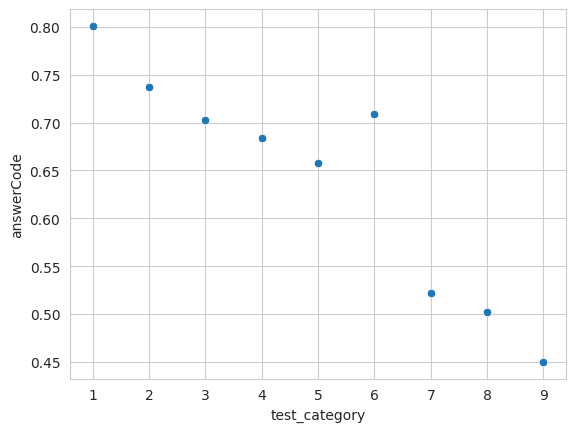

In [381]:
import seaborn as sns
 
sns.set_style('whitegrid')
sns.scatterplot(x=tt["test_category"], y=tt["answerCode"])

### 3 - 3 . 시험지 sequence id 별 정답률 
- sequence_id 가 증가할수록 정답률이 높아지는 경향
- 풀이한 학생 수는 적어짐 
- 상위권 학생들이 풀었을 가능성 

In [382]:
t = ana_assessmentItemID.groupby('test_seq_id').agg({ 'userID' : 'count' , 'answerCode' : percentile}).reset_index()

In [383]:
t

,test_seq_id,userID,answerCode
0,001,14911,0.710348
1,002,12390,0.774011
2,003,16970,0.626930
3,004,12332,0.678803
4,005,16325,0.617519
...,...,...,...
193,194,2596,0.694145
194,195,4417,0.835409
195,196,1304,0.895706
196,197,2973,0.757820


<AxesSubplot: xlabel='test_seq_id', ylabel='answerCode'>

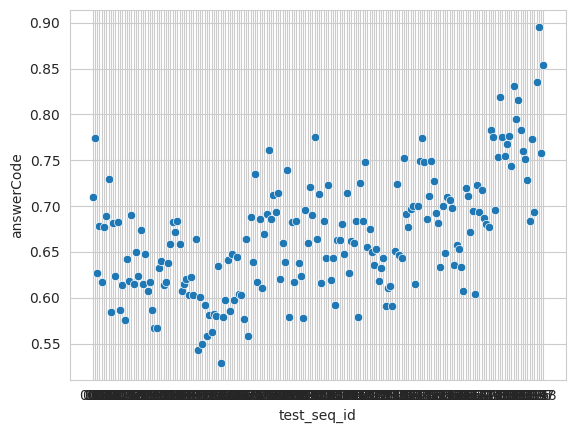

In [384]:
sns.set_style('whitegrid')
sns.scatterplot(x=t["test_seq_id"], y=t["answerCode"])

<AxesSubplot: xlabel='test_seq_id', ylabel='userID'>

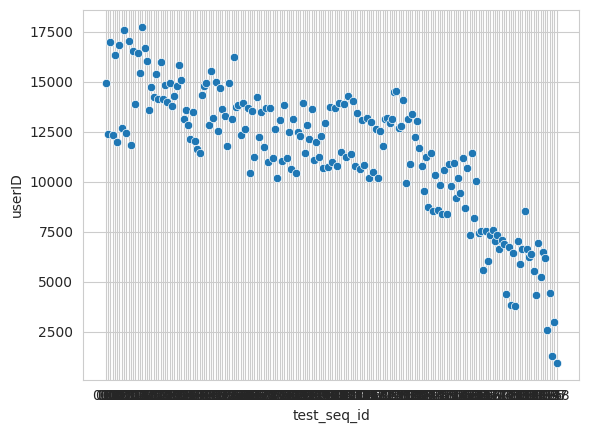

In [385]:
sns.set_style('whitegrid')
sns.scatterplot(x=t["test_seq_id"], y=t["userID"])

In [386]:
ttt = ana_assessmentItemID.groupby(['num_in_test']).agg({ 'userID' : 'count' , 'answerCode' : percentile}).reset_index()

In [387]:
ttt

,num_in_test,userID,answerCode
0,001,371755,0.749916
1,002,370972,0.720062
2,003,371640,0.687773
3,004,369705,0.663364
4,005,360607,0.599134
5,006,197772,0.555685
6,007,127121,0.515399
7,008,67150,0.457156
8,009,18417,0.481729
9,010,5342,0.527892


<AxesSubplot: xlabel='num_in_test', ylabel='answerCode'>

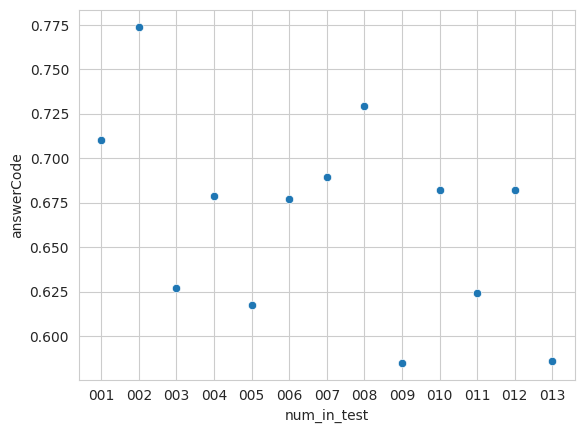

In [388]:
sns.set_style('whitegrid')
sns.scatterplot(x=ttt["num_in_test"], y=t["answerCode"])

In [389]:
ana_assessmentItemID

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,test_category,test_seq_id,num_in_test
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,001,001
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6,001,002
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6,001,003
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6,001,004
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6,001,005
...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,3,071,005
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,4,165,001
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,4,165,002
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,4,165,003


## 4. TimeStamp 처리 

#### 4 - 1 . 문제 풀이 시간 

In [390]:
train.groupby(['testId']).agg({ 'userID' : 'count' , 'answerCode' : percentile}).reset_index()

,testId,userID,answerCode
0,A010000001,1585,0.926183
1,A010000002,1550,0.931613
2,A010000003,1615,0.846440
3,A010000004,1540,0.883117
4,A010000005,1595,0.855172
...,...,...,...
1532,A090000070,344,0.418605
1533,A090000071,360,0.336111
1534,A090000072,270,0.418519
1535,A090000073,270,0.529630


In [391]:
ana_assessmentItemID_with_time = ana_assessmentItemID.copy()

In [392]:
ana_assessmentItemID_with_time["Timestamp"] = pd.to_datetime(ana_assessmentItemID_with_time["Timestamp"])

In [393]:
ana_assessmentItemID_with_time["ex_solve_time"] = ana_assessmentItemID_with_time["Timestamp"].shift(1).fillna(0)

In [394]:
ana_assessmentItemID_with_time["Timestamp"].shift(-1)

0         2020-03-24 00:17:14
1         2020-03-24 00:17:22
2         2020-03-24 00:17:29
3         2020-03-24 00:17:36
4         2020-03-24 00:17:47
                  ...        
2266581   2020-08-21 01:06:39
2266582   2020-08-21 01:06:50
2266583   2020-08-21 01:07:36
2266584   2020-08-21 01:08:49
2266585                   NaT
Name: Timestamp, Length: 2266586, dtype: datetime64[ns]

In [395]:
ana_assessmentItemID_with_time["Timestamp"] = ana_assessmentItemID["Timestamp"]

In [396]:
ana_assessmentItemID_with_time["Timestamp"] = pd.to_datetime( ana_assessmentItemID_with_time["Timestamp"] )

In [397]:
ana_assessmentItemID_with_time["solved_time"] = ana_assessmentItemID_with_time.groupby('userID')["Timestamp"].diff().shift(-1)

In [398]:
ana_assessmentItemID_with_time["solved_time"]

0          0 days 00:00:03
1          0 days 00:00:08
2          0 days 00:00:07
3          0 days 00:00:07
4          0 days 00:00:11
                ...       
2266581   76 days 18:16:18
2266582    0 days 00:00:11
2266583    0 days 00:00:46
2266584    0 days 00:01:13
2266585                NaT
Name: solved_time, Length: 2266586, dtype: timedelta64[ns]

In [399]:
ana_assessmentItemID_with_time["solved_time(s)"]= ana_assessmentItemID_with_time["solved_time"].dt.seconds

In [400]:
ana_assessmentItemID_with_time[ ana_assessmentItemID_with_time["solved_time(s)"] > 14400 ]["solved_time"].describe()

count                        226046
mean      4 days 10:28:31.303203772
std      12 days 04:46:52.282485080
min                 0 days 04:00:01
25%                 0 days 21:43:13
50%          1 days 22:05:45.500000
75%          3 days 22:44:19.750000
max               296 days 07:44:55
Name: solved_time, dtype: object

In [401]:
ana_assessmentItemID_with_time["year"] = ana_assessmentItemID_with_time['Timestamp'].dt.year

In [402]:
ana_assessmentItemID_with_time["month"] = ana_assessmentItemID_with_time['Timestamp'].dt.month

In [403]:
ana_assessmentItemID_with_time["day"] = ana_assessmentItemID_with_time['Timestamp'].dt.day

In [404]:
ana_assessmentItemID_with_time["hour"] = ana_assessmentItemID_with_time['Timestamp'].dt.hour

In [405]:
ana_assessmentItemID_with_time

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,test_category,test_seq_id,num_in_test,ex_solve_time,solved_time,solved_time(s),year,month,day,hour
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,001,001,0,0 days 00:00:03,3.0,2020,3,24,0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6,001,002,2020-03-24 00:17:11,0 days 00:00:08,8.0,2020,3,24,0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6,001,003,2020-03-24 00:17:14,0 days 00:00:07,7.0,2020,3,24,0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6,001,004,2020-03-24 00:17:22,0 days 00:00:07,7.0,2020,3,24,0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6,001,005,2020-03-24 00:17:29,0 days 00:00:11,11.0,2020,3,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,3,071,005,2020-06-05 06:49:57,76 days 18:16:18,65778.0,2020,6,5,6
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,4,165,001,2020-06-05 06:50:21,0 days 00:00:11,11.0,2020,8,21,1
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,4,165,002,2020-08-21 01:06:39,0 days 00:00:46,46.0,2020,8,21,1
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,4,165,003,2020-08-21 01:06:50,0 days 00:01:13,73.0,2020,8,21,1


In [406]:
ana_assessmentItemID_with_time.loc[ ana_assessmentItemID_with_time["solved_time(s)"] > 14400,"solved_time(s)"] = np.NaN

In [410]:
fill_mean_func = lambda g: g["solved_time(s)"].fillna(g["solved_time(s)"].median())

In [411]:
ana_assessmentItemID_with_time["solved_time(s)"] = ana_assessmentItemID_with_time.groupby('userID').apply(fill_mean_func).reset_index()["solved_time(s)"]

In [412]:
tttt = ana_assessmentItemID_with_time.groupby('userID').agg({ 'testId' : 'count' , 'solved_time(s)' : 'mean', 'answerCode' : percentile}).reset_index()

#### 문제 풀이 시간의 평균과 정답률은 크게 관계없어 보인다. 

<AxesSubplot: xlabel='solved_time(s)', ylabel='answerCode'>

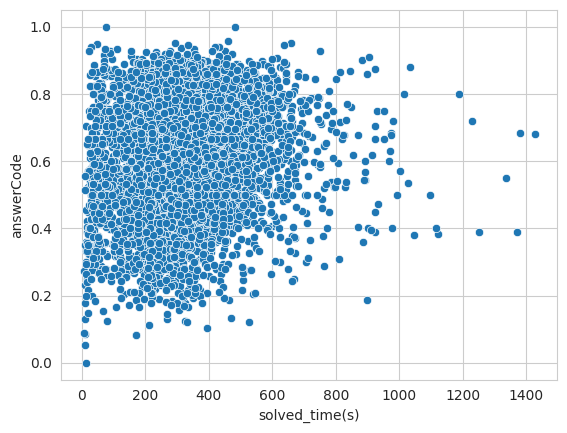

In [413]:
sns.set_style('whitegrid')
sns.scatterplot(x=tttt["solved_time(s)"], y=tttt["answerCode"])

#### 4 - 2 . 시간 대 별 정답률
- 크게 관계 없어 보인다 

In [414]:
edu_time_df = ana_assessmentItemID_with_time.copy()

# 시간대별 정답률
hour_dict = edu_time_df.groupby(['hour'])['answerCode'].mean().to_dict()
edu_time_df['correct_per_hour'] = edu_time_df['hour'].map(hour_dict)

ttttt = edu_time_df.groupby(['hour'])[['answerCode', 'correct_per_hour']].mean().reset_index()


<AxesSubplot: xlabel='hour', ylabel='answerCode'>

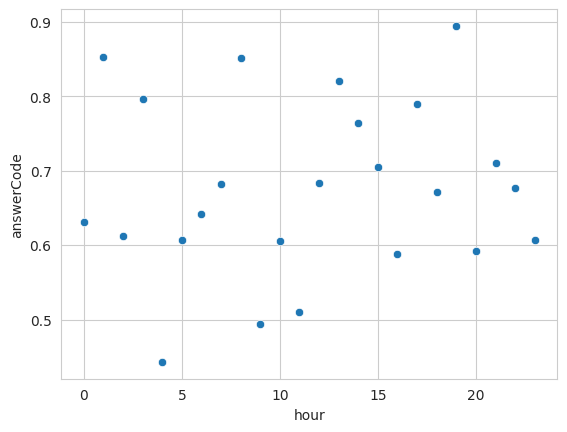

In [415]:
sns.set_style('whitegrid')
sns.scatterplot(x=ttttt["hour"], y=tttt["answerCode"])

#### 4 - 2 . 사용자가 야행성인지에 대한 여부 

In [416]:
edu_time_df = ana_assessmentItemID_with_time.copy()

# 사용자의 주 활동 시간
mode_dict = edu_time_df.groupby(['userID'])['hour'].agg(lambda x : pd.Series.mode(x)[0]).to_dict()
edu_time_df['hour_mode'] = edu_time_df['userID'].map(mode_dict)

# 사용자의 야행성 여부
edu_time_df['is_night'] = edu_time_df['hour_mode'] > 22
edu_time_df['is_night'] = edu_time_df['hour_mode'] < 5

edu_time_df[['userID', 'hour', 'hour_mode', 'is_night']]


,userID,hour,hour_mode,is_night
0,0,0,1,True
1,0,0,1,True
2,0,0,1,True
3,0,0,1,True
4,0,0,1,True
...,...,...,...,...
2266581,7441,6,6,False
2266582,7441,1,6,False
2266583,7441,1,6,False
2266584,7441,1,6,False


In [417]:
edu_time_df.groupby('is_night').agg({'userID':'count','answerCode':percentile})

,userID,answerCode
is_night,,
False,1611374,0.660598
True,655212,0.639082


In [418]:
#### 4 - 3 . 문제풀이시간 정규화

In [419]:
edu_custom_df = ana_assessmentItemID_with_time.copy()

# custom 함수 적용
# time 만 transform 
edu_custom_df['normalized_time'] = edu_custom_df.groupby('userID')['solved_time(s)'].transform(lambda x : ( x - x.mean() ) / x.std())

edu_custom_df[['userID', 'solved_time(s)', 'normalized_time']]



,userID,solved_time(s),normalized_time
0,0,3.0,-0.211533
1,0,8.0,-0.207310
2,0,7.0,-0.208155
3,0,7.0,-0.208155
4,0,11.0,-0.204777
...,...,...,...
2266581,7441,40.0,-0.239493
2266582,7441,11.0,-1.132458
2266583,7441,46.0,-0.054741
2266584,7441,73.0,0.776640


In [428]:
edu_custom_df = ana_assessmentItemID_with_time.copy()

# custom 함수 적용
# apply 를 이용하여 time column 을 직접 지정할 수 있다.
print(edu_custom_df.groupby('userID').apply(lambda x : x['solved_time(s)'] - x['solved_time(s)'].mean()))
edu_custom_df['relative_time'] = edu_custom_df.groupby('userID').apply(lambda x : x['solved_time(s)'] - x['solved_time(s)'].mean()).values

edu_custom_df[['userID', 'solved_time(s)', 'relative_time']]


userID         
0       0         -250.467114
        1         -245.467114
        2         -246.467114
        3         -246.467114
        4         -242.467114
                      ...    
7441    2266581     -7.777778
        2266582    -36.777778
        2266583     -1.777778
        2266584     25.222222
        2266585     -7.777778
Name: solved_time(s), Length: 2266586, dtype: float64


,userID,solved_time(s),relative_time
0,0,3.0,-250.467114
1,0,8.0,-245.467114
2,0,7.0,-246.467114
3,0,7.0,-246.467114
4,0,11.0,-242.467114
...,...,...,...
2266581,7441,40.0,-7.777778
2266582,7441,11.0,-36.777778
2266583,7441,46.0,-1.777778
2266584,7441,73.0,25.222222


----